In [2]:
import cv2
from matplotlib import pyplot as plt
# 開啟圖像
#請將編號作更改，謝謝(1-5)
image = cv2.imread("1.jpg")

In [3]:
##透過新的window開啟
##cv2.imshow('ocr',image)
##cv2.waitKey(0)

In [4]:
##透過jupyter notebook開啟圖片
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height,width,depth = im_data.shape

    figsize = width/float(dpi),height/float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])

    ax.axis('off')
    ax.imshow(im_data,cmap='gray')

    plt.show()

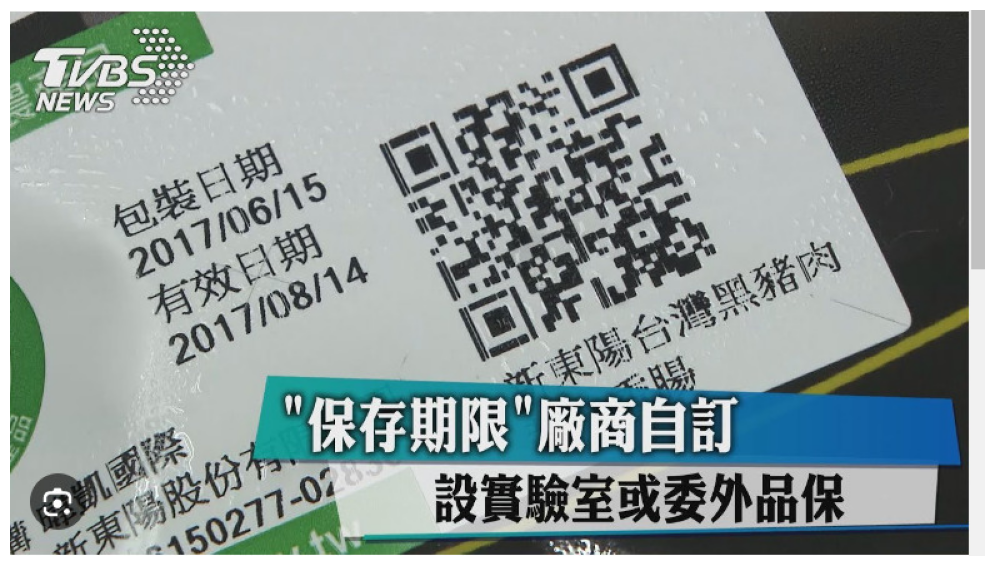

In [5]:
display('1.jpg')

In [6]:
##invert image透過顏色的顛倒進行圖像預處理
inverted_image = cv2.bitwise_not(image)
cv2.imwrite("1_invert.jpg",inverted_image)

True

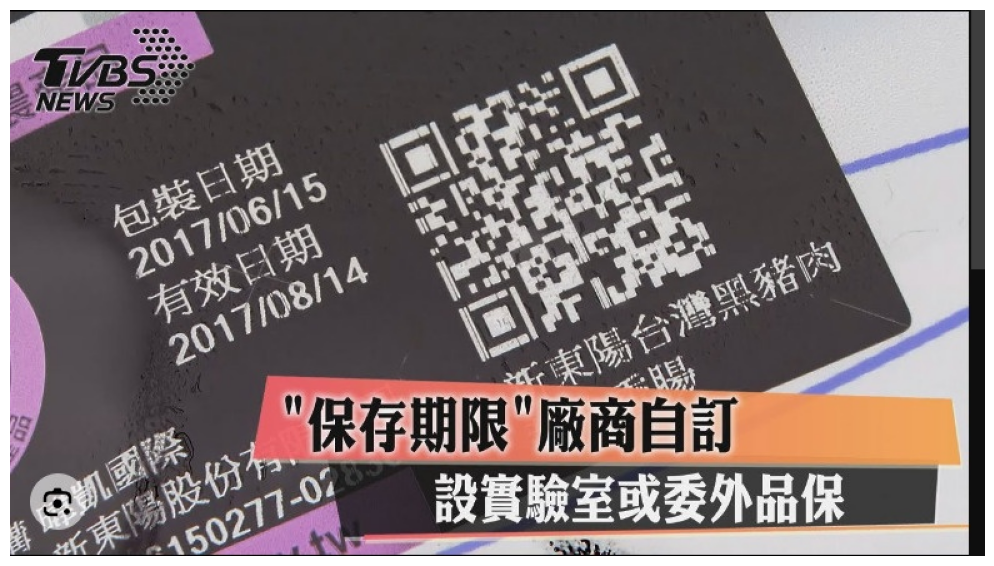

In [7]:
display("1_invert.jpg")

In [8]:
##二質化透過此方法將透過顏色轉為黑白
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imwrite("1_gray.jpg",gray_image)
##cv2.imshow("1gray_image",gray_image)
##cv2.waitKey(0)

True

In [9]:
##將黑白對比提高
thresh,im_bw = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
cv2.imwrite("1_bw_image.jpg",im_bw)
##cv2.imshow("1_im_bw",im_bw)
##cv2.waitKey(0)

True

In [10]:
##移除圖片上的噪點
def noise_removal(image):
    import numpy as np
    kernal = np.ones((1 ,1),np.uint8)
    image = cv2.dilate(image,kernal,iterations=1)
    kernal = np.ones((1,1),np.uint8)
    image = cv2.erode(image,kernal,iterations=1)
    image = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernal)
    image = cv2.medianBlur(image,3)
    return(image)

In [11]:
no_noise = noise_removal(im_bw) 
cv2.imwrite("1_no_noise.jpg",no_noise)

True

In [12]:
##cv2.imshow("1_im_bw",im_bw)
##cv2.imshow("1_no_noise",no_noise)
##cv2.waitKey(0)

In [13]:
##透過Dilation and Erosion去修正移除噪點所導致字體過粗或過細之問題
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((3,3),np.int8)
    image = cv2.erode(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return(image)

def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.int8)
    image = cv2.dilate(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return(image)

In [14]:
dilate_image = thick_font(no_noise)
eroded_image = thin_font(no_noise)
##cv2.imwrite("1_eroded_image.jpg",eroded_image)
cv2.imwrite("1_dilate_image.jpg",dilate_image)
##cv2.imshow("1_dilate_image",dilate_image)
##cv2.imshow("1_eroded_image",eroded_image)
##cv2.waitKey(0)

True

In [15]:
##以肉眼來看，目前im_bw的字看得最清晰

In [16]:
##由於預處理後的保存期限四字為白字，在不影響判斷的情況下轉為黑字
new_inverted_image = cv2.bitwise_not(dilate_image)
cv2.imwrite("new_invert.jpg",new_inverted_image)
##cv2.waitKey(0)

True

In [17]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# 使用OCR進行文字識別
text = pytesseract.image_to_string(inverted_image, lang='chi_tra')
print(text)

ig 閒 - 人
保存 期 限 廠商 自 訂
GIWOT 設 宙 險 室 或 妥 外 品 保 點




In [18]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# 使用OCR進行文字識別
imge1=cv2.imread("1.jpg")
imge2=cv2.imread("1_invert.jpg")
imge3=cv2.imread("1_gray.jpg")
imge4=cv2.imread("1_no_noise.jpg")
imge5=cv2.imread("1_eroded_image.jpg")
imge6=cv2.imread("1_dilate_image.jpg")
imge7=cv2.imread("1_bw_image.jpg")
text = pytesseract.image_to_string(imge1, lang='chi_tra')
print(text)

ig 閒 -
保存 期 限 廠商 自 訂
GIWOT 設 宙 險 室 或 妥 外 品 保 點




In [19]:
text = pytesseract.image_to_string(imge2, lang='chi_tra')
print(text)

Re
加 保存 期 限 縣 商 自 訂
(GO 。 設 實驗 室 或 委 外 品 保

人
人



In [20]:
text = pytesseract.image_to_string(imge3, lang='chi_tra')
print(text)

點 人 了 生
(GO. 。 設 實驗 室 或 委 外 品 保



In [21]:
text = pytesseract.image_to_string(imge4, lang='chi_tra')
print(text)

In [22]:
text = pytesseract.image_to_string(imge5, lang='chi_tra')
print(text)

In [23]:
text = pytesseract.image_to_string(imge6, lang='chi_tra')
print(text)

MA

, 妥 g
1. 戰 設 縮 驗 室 或 委 外 品 保




In [24]:
text = pytesseract.image_to_string(imge7, lang='chi_tra')
print(text)

生 "保存 則 限 " 訂 商 自 訂
“BO 3 。 設 實驗 室 或 委 外 品 保



In [25]:
##透過七項圖片預處裡並在每個階段嘗試辨識，只有在原圖與invert的情況之下辨識出保存期
##限之四字樣